In [37]:
import pandas as pd

json_file_path = "/Users/ezequielesparza/TKH-Social-Media-Engagement-Analytics/data/dataset_instagram-scraper_2023-04-11_20-38-43-027.json"
df = pd.read_json(json_file_path)
pd.set_option('display.max_columns', None)

df

,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,firstComment,latestComments,dimensionsHeight,dimensionsWidth,displayUrl,images,likesCount,timestamp,childPosts,ownerFullName,ownerUsername,ownerId,isSponsored,alt,videoUrl,videoViewCount,videoPlayCount,locationName,locationId,productType,videoDuration,taggedUsers,title,description
0,3.075855e+18,Sidecar,CqvoZzULx7e,#Tech is increasingly becoming an #EssentialTo...,"[Tech, EssentialTool, jobs., TapIn, TechIndust...",[],https://www.instagram.com/p/CqvoZzULx7e/,1.0,👏🏼,"[{'id': '17980439755908690', 'text': '👏🏼', 'ow...",1080.0,1080.0,https://instagram.fntr5-1.fna.fbcdn.net/v/t51....,[https://instagram.fntr5-1.fna.fbcdn.net/v/t51...,17.0,2023-04-07 18:01:40+00:00,"[{'id': '3075854752495254239', 'type': 'Image'...",The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.070079e+18,Image,CqbHD33vMiW,Informational #interviews are essential for #c...,"[interviews, career, interviewing., ExpandOppr...",[],https://www.instagram.com/p/CqbHD33vMiW/,0.0,,[],1080.0,1080.0,https://scontent-hbe1-1.cdninstagram.com/v/t51...,[],17.0,2023-03-30 18:45:16+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.078740e+18,Video,Cq54bj-vztp,"Come on by this #Saturday, April 15th at 1pm, ...","[Saturday,, OpenHouse!, BronxEvents, NYC, NewY...",[],https://www.instagram.com/p/Cq54bj-vztp/,0.0,,[],1137.0,640.0,https://instagram.fbdo9-1.fna.fbcdn.net/v/t51....,[],8.0,2023-04-11 17:35:00+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,https://instagram.fbdo9-1.fna.fbcdn.net/v/t66....,97.0,242.0,"New York, New York",212988663.0,clips,5.202,NaN,NaN,NaN
3,3.073725e+18,Image,CqoEOzPPV9h,It’s #TechTuesday! Today we'll be talking abou...,"[TechTuesday!, DayintheLife, WebDevelopment., ...",[],https://www.instagram.com/p/CqoEOzPPV9h/,1.0,Excited to give back and share with my communi...,"[{'id': '17987013259901690', 'text': 'Excited ...",1080.0,1080.0,https://scontent-lcy1-1.cdninstagram.com/v/t51...,[],17.0,2023-04-04 19:30:37+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'full_name': 'Lidia • Software Engineer •Afr...,NaN,NaN
4,3.069354e+18,Image,CqYiRTGrGDa,It's #WomenCrushWednesday and today we're chec...,"[WomenCrushWednesday, India., WomenSupportingW...",[],https://www.instagram.com/p/CqYiRTGrGDa/,1.0,"Fantastic\nphoto, we would certainly like to...","[{'id': '17996539900770096', 'text': 'Fantasti...",1080.0,1080.0,https://z-p42-instagram.fadb6-4.fna.fbcdn.net/...,[],10.0,2023-03-29 18:45:18+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2.820809e+18,Image,CclhmzLlycJ,We had a wonderful information session with @n...,"[ExpandOpportunity, Tech, TechProgram, Coding,...",[newvillagegirlsacademy],https://www.instagram.com/p/CclhmzLlycJ/,2.0,Wow 🤗 send pics @black.familye_😍,"[{'id': '17958334312681006', 'text': 'Wow 🤗 se...",810.0,1080.0,https://scontent-fra5-2.cdninstagram.com/v/t51...,[],31.0,2022-04-20 20:30:06+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2.815645e+18,Image,CcTLclmLLG7,"In honor of #nationalvolunteermonth, we are re...","[nationalvolunteermonth,, ExpandOpportunity, v...",[ayoitscrowder).],https://www.instagram.com/p/CcTLclmLLG7/,0.0,,[],1080.0,1080.0,https://instagram.fopo6-1.fna.fbcdn.net/v/t51....,[],17.0,2022-04-13 17:30:09+00:00,[],The Knowledge House,theknowledgehouse,1.133084e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2.827317e+18,Image,Cc8pXs7FC3X,It's that time of the month to announce our #S...,"[StaffoftheMonth,, ExpandOpportunity, StaffApp...",[],https://www.instagram.com/p/Cc8pXs7FC3X/,0.0,,[],1080.0,1080.0,https://scontent-mi

In [38]:
null_counts = df.isnull().sum()
print(null_counts)

id                    1
type                  1
shortCode             1
caption               1
hashtags              1
mentions              1
url                   1
commentsCount         1
firstComment          1
latestComments        1
dimensionsHeight      1
dimensionsWidth       1
displayUrl            1
images                1
likesCount            1
timestamp             1
childPosts            1
ownerFullName         1
ownerUsername         1
ownerId               1
isSponsored           1
alt                 196
videoUrl            139
videoViewCount      139
videoPlayCount      160
locationName        133
locationId          133
productType         139
videoDuration       139
taggedUsers         154
title               195
description         195
dtype: int64


In [39]:
is_sponse = df[df['isSponsored'] == 1]
is_sponse

,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,firstComment,latestComments,dimensionsHeight,dimensionsWidth,displayUrl,images,likesCount,timestamp,childPosts,ownerFullName,ownerUsername,ownerId,isSponsored,alt,videoUrl,videoViewCount,videoPlayCount,locationName,locationId,productType,videoDuration,taggedUsers,title,description


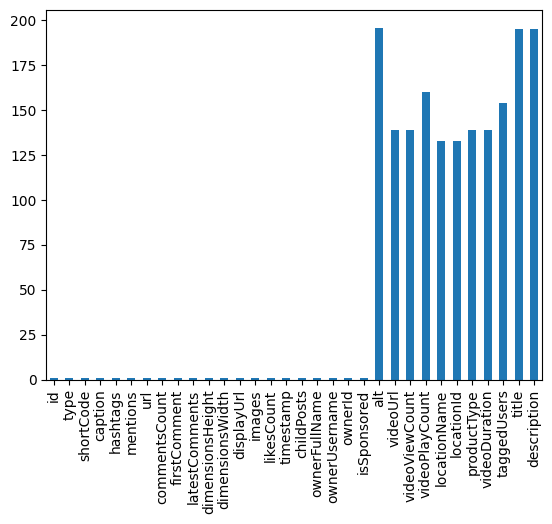

In [40]:
import matplotlib.pyplot as plt

null_counts = df.isnull().sum()
null_counts.plot(kind='bar')
plt.show()

In [41]:
# drop columns with over 190 null values
df = df.drop(['id', 'shortCode', 'url', 'dimensionsHeight', 'dimensionsWidth', 'displayUrl', 'images', 'childPosts', 'ownerFullName', 'ownerUsername', 'ownerId', 'isSponsored', 'alt', 'videoUrl', 'locationName', 'locationId', 'productType','taggedUsers' ,'title', 'description'], axis=1)

In [61]:
hashtag_likes = df.explode('hashtags').groupby('hashtags')['likesCount'].sum().sort_values(ascending=False)
hashtag_likes

hashtags
ExpandOpportunity    3472.0
KnowledgePays        1091.0
LosAngeles            968.0
Tech                  925.0
Atlanta               838.0
                      ...  
latinx                  5.0
healthcheck             5.0
HIVTesting              5.0
nyc                     5.0
healthfair              5.0
Name: likesCount, Length: 648, dtype: float64

In [67]:
df_exploded = df.explode('hashtags')
df_exploded
df_exploded.to_csv('IG_cleaned_data.csv', index=False)